<a href="https://colab.research.google.com/github/datasciencechampion/Zero-to-Hero-in-NLP-LLM-GenAI-AGI/blob/main/Embedding/word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Word Embedding - Word2Vec**

This module is part of [Zero-to-Hero in data Science](https://colab.research.google.com/drive/1EGLE0Lnst0CNmkw5BOFGSqIT5oxl5xYW?usp=sharing)

Author : [Pramod Singh](https://www.linkedin.com/in/pramod-singh-4635962/)

# Topic Covered
- [What is Word Embedding](#1)
  - [Skip-Gram](#1.1)
  - [CBOW(Continuous Bag of Words)](#1.2)
- [Hands-on - Training Word Embedding models](#2)
  - [Skpi-Gram](#2.1)
  - [CBOW(Continuous Bag of Words)](#2.1)


<a name='1'></a>
# **What is Embedding**

Embedding is the backbone of almost all NLP task like Search, Clustering, Recommendations, Anomaly detection, Question Answering, Classification and many more….

Embeddings play a pivotal role in NLP and LLM by converting words into numerical vectors to capture semantic relationships between words & sentences in the whole corpus, enabling machines to understand context and meaning of human language as close as possible like human.

Their importance lies in providing a numerical foundation for language understanding, enabling machines to navigate the complexities of human communication effectively. In essence, embeddings are the linchpin for the success of various language-based applications in the realms of NLP and LLM.

<a name='1.1'></a>
## Embedding Types

🎯 **Word embeddings**: Word embeddings represent individual words as vectors. These vectors are typically learned from a large corpus of text, and they can be used to capture the meaning of words and their relationships to other words. This notebook is all about word embedding.

🎯 **Sentence embeddings**: Sentence embeddings represent entire sentences as vectors. These vectors are typically created by averaging the word embeddings of the words in the sentence, and they can be used to capture the meaning of sentences and their relationships to other sentences.

Sentence embedding is explained in [here ▶](https://colab.research.google.com/drive/1-R7Spq5dtZG7VtZ7loM-o0BEI517w8Ks?usp=sharing)

⛳ But it is recommended to read and understand word embedding concept first which is explained in this notebook.


🎯 **Topic embeddings**: Topic embeddings represent topics as vectors. These vectors are typically created by clustering word embeddings, and they can be used to capture the meaning of topics and their relationships to other topics.

🎯 **Document embeddings**: Document embeddings represent entire documents as vectors. These vectors are typically created by averaging the sentence embeddings of the sentences in the document, and they can be used to capture the meaning of documents and their relationships to other documents.


<a name='1.1'></a>
# Word Embedding - Skip-Gram

<a name='1.2'></a>
# Word Embedding - CBOW

<a name='2'></a>
## Hands-on - Training Word Embedding models

<a name='2.1'></a>
## Hands-on - Training - Skip-Gram word embedding model

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import Normalize
from matplotlib import cm

In [ ]:
# Text sample
text = "cat is a pet animal. cat has two eyes. cat has four legs. dog is a pet animal. dog has two eyes. dog has four legs. in my home i have a dog."

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stopwords dataset
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def remove_stop_words(text):
    # Tokenize the input text
    words = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtered_words)

    return filtered_text

In [ ]:
text_after_stop_words = remove_stop_words(text)
print("Original Text:", text)
print("Text after removing stop words:", text_after_stop_words)

Original Text: cat is a pet animal. cat has two eyes. cat has four legs. dog is a pet animal. dog has two eyes. dog has four legs. in my home i have a dog.
Text after removing stop words: cat pet animal . cat two eyes . cat four legs . dog pet animal . dog two eyes . dog four legs . home dog .


# Tokenization

In [ ]:
# Tokenize the text using the Tokenizer from TensorFlow and Keras
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts([text_after_stop_words])
words = list(tokenizer.word_index.keys())  # Convert dict_keys to a list

In [ ]:
# See the word index or token number
tokenizer.word_index

{'dog': 1,
 'cat': 2,
 'pet': 3,
 'animal': 4,
 'two': 5,
 'eyes': 6,
 'four': 7,
 'legs': 8,
 'home': 9}

# Generate Training Data for Skip-Gram

A skip-gram is a pair of words (the target word and the context word) and a label indicating whether the context word appears within a fixed window size of the target word in the input text. Skip grams are used as training data for the word embedding model.

Eg:  [(target, context), relevancy]

In [ ]:
# Generate training data for Skip-gram model
window_size = 5
training_data = []

for i in range(len(words)):
    target_word = words[i]
    context_words = [words[j] for j in range(max(0, i - window_size), min(len(words), i + window_size + 1)) if j != i]

    for context_word in context_words:
        training_data.append((tokenizer.word_index[target_word], tokenizer.word_index[context_word]))

# Convert training data to NumPy arrays
training_data = np.array(training_data)

In [ ]:
training_data

array([[1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [2, 1],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [3, 1],
       [3, 2],
       [3, 4],
       [3, 5],
       [3, 6],
       [3, 7],
       [3, 8],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 5],
       [4, 6],
       [4, 7],
       [4, 8],
       [4, 9],
       [5, 1],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 6],
       [5, 7],
       [5, 8],
       [5, 9],
       [6, 1],
       [6, 2],
       [6, 3],
       [6, 4],
       [6, 5],
       [6, 7],
       [6, 8],
       [6, 9],
       [7, 2],
       [7, 3],
       [7, 4],
       [7, 5],
       [7, 6],
       [7, 8],
       [7, 9],
       [8, 3],
       [8, 4],
       [8, 5],
       [8, 6],
       [8, 7],
       [8, 9],
       [9, 4],
       [9, 5],
       [9, 6],
       [9, 7],
       [9, 8]])

# Building the Skip-Gram Model Architecture

Let's define the word embedding model's architecture using Keras's functional API.

The model has two embedding layers for the target and context words, which are concatenated and passed through a dense layer with a sigmoid activation function to predict the probability of the context word appearing within a fixed window of the target word.

In [ ]:
# Define Skip-gram model
embedding_dim = 3
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1),
    tf.keras.layers.Reshape((embedding_dim,)),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# Train the Model
In order to train the word embedding model on the skip grams we'll use the fit method. The model is trained for a specified number of epochs(the number of times the model sees the entire dataset during training.)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the model
model.fit(x=training_data[:, 0], y=training_data[:, 1], epochs=200, verbose=2)

Epoch 1/200
2/2 - 2s - loss: 2.2511 - 2s/epoch - 771ms/step
Epoch 2/200
2/2 - 0s - loss: 2.2501 - 26ms/epoch - 13ms/step
Epoch 3/200
2/2 - 0s - loss: 2.2495 - 24ms/epoch - 12ms/step
Epoch 4/200
2/2 - 0s - loss: 2.2490 - 13ms/epoch - 7ms/step
Epoch 5/200
2/2 - 0s - loss: 2.2485 - 25ms/epoch - 13ms/step
Epoch 6/200
2/2 - 0s - loss: 2.2480 - 16ms/epoch - 8ms/step
Epoch 7/200
2/2 - 0s - loss: 2.2475 - 18ms/epoch - 9ms/step
Epoch 8/200
2/2 - 0s - loss: 2.2470 - 18ms/epoch - 9ms/step
Epoch 9/200
2/2 - 0s - loss: 2.2466 - 17ms/epoch - 9ms/step
Epoch 10/200
2/2 - 0s - loss: 2.2460 - 17ms/epoch - 8ms/step
Epoch 11/200
2/2 - 0s - loss: 2.2455 - 16ms/epoch - 8ms/step
Epoch 12/200
2/2 - 0s - loss: 2.2450 - 13ms/epoch - 6ms/step
Epoch 13/200
2/2 - 0s - loss: 2.2445 - 18ms/epoch - 9ms/step
Epoch 14/200
2/2 - 0s - loss: 2.2439 - 17ms/epoch - 9ms/step
Epoch 15/200
2/2 - 0s - loss: 2.2435 - 20ms/epoch - 10ms/step
Epoch 16/200
2/2 - 0s - loss: 2.2430 - 14ms/epoch - 7ms/step
Epoch 17/200
2/2 - 0s - loss:

# Get Word Embeddings

To see results from the model, we first need to extract the trained word embeddings from the word embedding model.

The word embeddings are the **weights** of the embedding layer, which are the dense vector representations of the words in the vocabulary.

The **shape** of the weights tensor is (vocab_size, embedding_size), where vocab_size is the size of the vocabulary and embedding_size is the length of the dense vector representation of each word.

In [ ]:
# Get word embeddings
word_embeddings = model.layers[0].get_weights()[0]

In [ ]:
word_embeddings

array([[ 1.8131267e-02,  9.0906508e-03,  2.8929416e-02],
       [-3.4392938e-01, -4.2000878e-01,  3.3464843e-01],
       [-1.7316224e-01, -1.1535933e-02,  4.7484601e-01],
       [-1.9547485e-01,  2.4315502e-01,  5.4841284e-02],
       [ 2.4688725e-01, -4.8598230e-02,  3.6441319e-02],
       [ 5.2351534e-02, -1.1405032e-01, -1.7526220e-01],
       [-1.2945348e-01,  3.2007299e-02,  5.2085537e-02],
       [-1.9013484e-01, -4.6782044e-01, -1.7005748e-01],
       [-2.2351395e-01, -2.8514990e-01,  3.0658185e-01],
       [-4.7825062e-01,  4.0293759e-05,  5.5071011e-02]], dtype=float32)

# Lets print and see the Embedding

In [ ]:
# Print word and its embedding
for word, idx in tokenizer.word_index.items():
    embedding = word_embeddings[idx]
    print(f"{word}: {embedding}")

dog: [-0.34392938 -0.42000878  0.33464843]
cat: [-0.17316224 -0.01153593  0.474846  ]
pet: [-0.19547485  0.24315502  0.05484128]
animal: [ 0.24688725 -0.04859823  0.03644132]
two: [ 0.05235153 -0.11405032 -0.1752622 ]
eyes: [-0.12945348  0.0320073   0.05208554]
four: [-0.19013484 -0.46782044 -0.17005748]
legs: [-0.22351395 -0.2851499   0.30658185]
home: [-4.7825062e-01  4.0293759e-05  5.5071011e-02]


#Finding word similarity using trained word embedding

Now we will try to find the similar word for "cat" using our trained word embedding model(weights)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate cosine similarity for "cat"
target_word = 'cat'
# Find the index of the word target_word
target_word_index = tokenizer.word_index[target_word]

# Get the embedding for the target_word
target_word_embedding = word_embeddings[target_word_index]

# Calculate cosine similarity with all other words
similarities = cosine_similarity(target_word_embedding.reshape(1, -1), word_embeddings)

# Display similarity scores for "cat"
similarity_scores = list(zip(words, similarities[0]))
similarity_scores.sort(key=lambda x: x[1], reverse=True)

print(f"Top 5 similar words to 'cat':")
for word, score in similarity_scores[:6]:
    print(f"{word}: {score:.4f}")

Top 5 similar words to 'cat':
pet: 1.0000
home: 0.7817
cat: 0.6926
four: 0.6463
dog: 0.5874
animal: 0.3565


<ipython-input-51-cee11646a286>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
<ipython-input-51-cee11646a286>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Cosine Similarity')


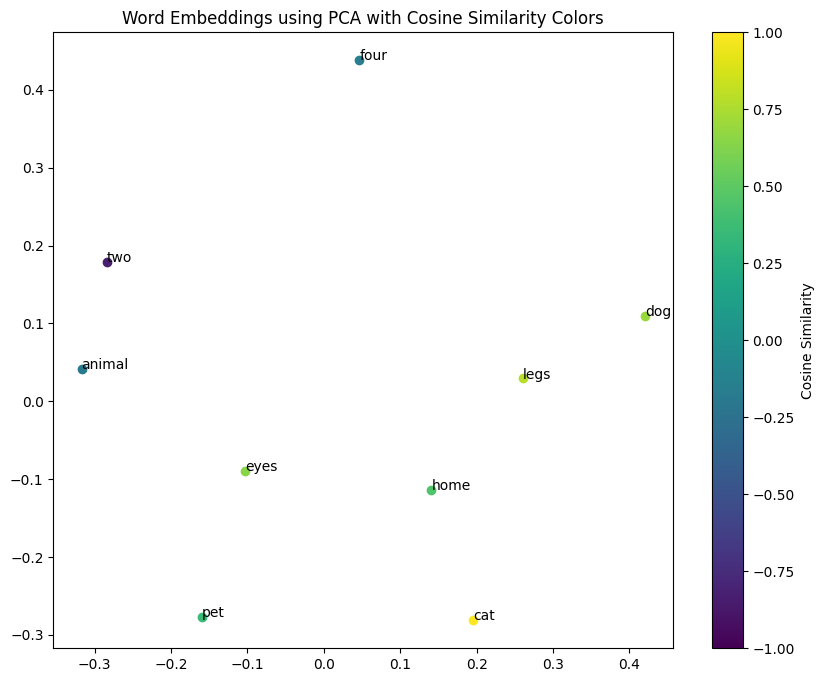

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import Normalize
from matplotlib import cm

# Calculate cosine similarity for all word pairs
similarity_matrix = cosine_similarity(word_embeddings)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(word_embeddings)

# Display word embeddings in vector space with colors based on cosine similarity
plt.figure(figsize=(10, 8))

# Use a colormap to map similarity values to colors
norm = Normalize(vmin=-1, vmax=1)
cmap = cm.get_cmap('viridis')

for word, idx in tokenizer.word_index.items():
    x, y = embeddings_2d[idx]

    # Calculate cosine similarity with a reference word (e.g., 'cat')
    reference_word = 'cat'
    #reference_idx = word2idx[reference_word]
    reference_idx =tokenizer.word_index[reference_word]
    similarity_value = similarity_matrix[idx, reference_idx]

    # Map similarity value to a color using the colormap
    color = cmap(norm(similarity_value))

    plt.scatter(x, y, color=color)
    plt.text(x, y, word)

plt.title('Word Embeddings using PCA with Cosine Similarity Colors')
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Cosine Similarity')
plt.show()


In this example, I've used the 'viridis' colormap, which ranges from blue (low similarity) to yellow (high similarity). You can choose a different colormap based on your preferences. The ScalarMappable and colorbar functions are used to add a colorbar to the plot, providing a reference for the mapping between colors and cosine similarity values.

# Result Analysis
In the above result, we can clearly see that:

✅ "cat" & "dog" are closer to each other

<a name='2.2'></a>
## Hands-on - Training - CBOW(Continuous Bag of Words)

Continuous Bag of Words (CBOW) is another word embedding model that predicts the target word based on its context words. Here's an example of how you can implement CBOW and visualize the word embeddings using PCA

We are using the same text sample and tokenizer , therefore we are not repeating the tokenization step.

We will directly start with creating training data.

## Preparing Training Data

In [ ]:
len(words)

9

In [ ]:
# Generate training data for CBOW model
window_size = 3
training_data = []

for i in range(window_size, len(words) - window_size):
    context = [words[j] for j in range(i - window_size, i + window_size + 1) if j != i]
    target = words[i]
    training_data.append((context, target))

# Convert training data to NumPy arrays
X = []
y = []

for context, target in training_data:
    context_indices = [tokenizer.word_index[word] for word in context]
    target_index = tokenizer.word_index[target]
    X.append(context_indices)
    y.append(target_index)

X = np.array(X)
y = np.array(y)

In [ ]:
training_data

[(['dog', 'cat', 'pet', 'two', 'eyes', 'four'], 'animal'),
 (['cat', 'pet', 'animal', 'eyes', 'four', 'legs'], 'two'),
 (['pet', 'animal', 'two', 'four', 'legs', 'home'], 'eyes')]

In [ ]:
X

array([[1, 2, 3, 5, 6, 7],
       [2, 3, 4, 6, 7, 8],
       [3, 4, 5, 7, 8, 9]])

In [ ]:
y

array([4, 5, 6])

# Building the CBOW Model Architecture
Let's define the word embedding model's architecture using Keras's functional API.

In [ ]:
# Define CBOW model
embedding_dim = 3
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for the padding token

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=2*window_size),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

## Training

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Train the model
model.fit(x=X, y=y, epochs=200, verbose=2)

Epoch 1/200
1/1 - 1s - loss: 2.2961 - 724ms/epoch - 724ms/step
Epoch 2/200
1/1 - 0s - loss: 2.2941 - 16ms/epoch - 16ms/step
Epoch 3/200
1/1 - 0s - loss: 2.2922 - 10ms/epoch - 10ms/step
Epoch 4/200
1/1 - 0s - loss: 2.2902 - 10ms/epoch - 10ms/step
Epoch 5/200
1/1 - 0s - loss: 2.2882 - 9ms/epoch - 9ms/step
Epoch 6/200
1/1 - 0s - loss: 2.2862 - 10ms/epoch - 10ms/step
Epoch 7/200
1/1 - 0s - loss: 2.2842 - 9ms/epoch - 9ms/step
Epoch 8/200
1/1 - 0s - loss: 2.2822 - 8ms/epoch - 8ms/step
Epoch 9/200
1/1 - 0s - loss: 2.2801 - 8ms/epoch - 8ms/step
Epoch 10/200
1/1 - 0s - loss: 2.2781 - 8ms/epoch - 8ms/step
Epoch 11/200
1/1 - 0s - loss: 2.2761 - 9ms/epoch - 9ms/step
Epoch 12/200
1/1 - 0s - loss: 2.2741 - 9ms/epoch - 9ms/step
Epoch 13/200
1/1 - 0s - loss: 2.2721 - 7ms/epoch - 7ms/step
Epoch 14/200
1/1 - 0s - loss: 2.2700 - 10ms/epoch - 10ms/step
Epoch 15/200
1/1 - 0s - loss: 2.2680 - 8ms/epoch - 8ms/step
Epoch 16/200
1/1 - 0s - loss: 2.2659 - 8ms/epoch - 8ms/step
Epoch 17/200
1/1 - 0s - loss: 2.263

In [ ]:
# Get word embeddings
word_embeddings = model.layers[0].get_weights()[0]

In [ ]:
# Print word and its embedding
for word, idx in tokenizer.word_index.items():
    embedding = word_embeddings[idx]
    print(f"{word}: {embedding}")

dog: [-0.13837346  0.21321854  0.14672078]
cat: [ 0.26301593  0.27006242 -0.22385904]
pet: [ 0.25497943  0.270787   -0.29813167]
animal: [ 0.25860223  0.25587687 -0.27890342]
two: [0.20789154 0.31674227 0.12259838]
eyes: [ 0.21021767  0.20105237 -0.25242764]
four: [ 0.22399643  0.25267    -0.26798683]
legs: [ 0.23858668  0.27797726 -0.21578498]
home: [ 0.19539188 -0.10717016  0.08891442]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Calculate cosine similarity for "cat"
target_word = 'cat'
# Find the index of the word target_word
target_word_index = tokenizer.word_index[target_word]

# Get the embedding for the target_word
target_word_embedding = word_embeddings[target_word_index]

# Calculate cosine similarity with all other words
similarities = cosine_similarity(target_word_embedding.reshape(1, -1), word_embeddings)

# Display similarity scores for "cat"
similarity_scores = list(zip(words, similarities[0]))
similarity_scores.sort(key=lambda x: x[1], reverse=True)

print(f"Top 5 similar words to 'cat':")
for word, score in similarity_scores[:6]:
    print(f"{word}: {score:.4f}")

Top 5 similar words to 'cat':
pet: 1.0000
home: 0.9985
two: 0.9929
legs: 0.9902
animal: 0.9901
four: 0.9836


<ipython-input-92-cee11646a286>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')
<ipython-input-92-cee11646a286>:39: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Cosine Similarity')


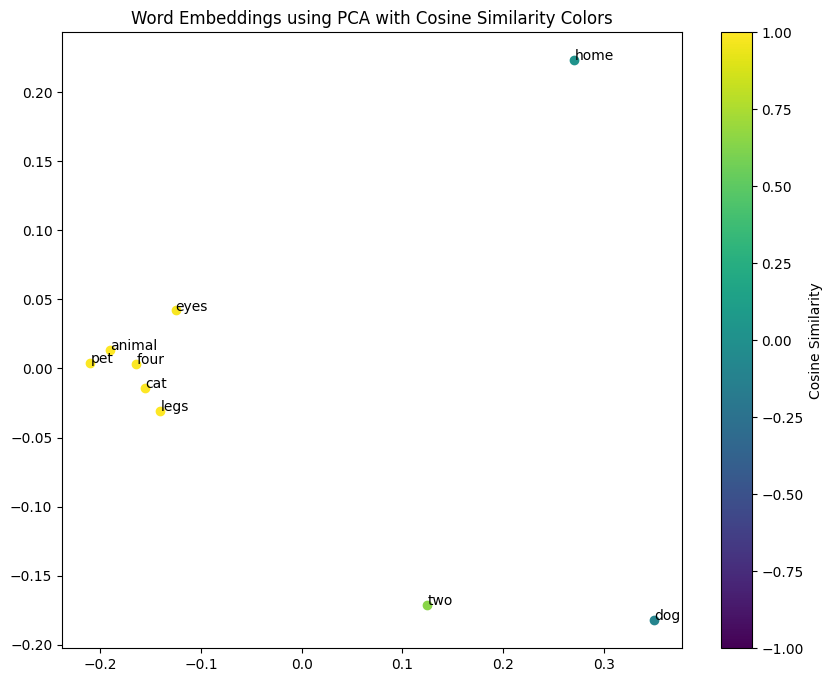

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib.colors import Normalize
from matplotlib import cm

# Calculate cosine similarity for all word pairs
similarity_matrix = cosine_similarity(word_embeddings)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(word_embeddings)

# Display word embeddings in vector space with colors based on cosine similarity
plt.figure(figsize=(10, 8))

# Use a colormap to map similarity values to colors
norm = Normalize(vmin=-1, vmax=1)
cmap = cm.get_cmap('viridis')

for word, idx in tokenizer.word_index.items():
    x, y = embeddings_2d[idx]

    # Calculate cosine similarity with a reference word (e.g., 'cat')
    reference_word = 'cat'
    #reference_idx = word2idx[reference_word]
    reference_idx =tokenizer.word_index[reference_word]
    similarity_value = similarity_matrix[idx, reference_idx]

    # Map similarity value to a color using the colormap
    color = cmap(norm(similarity_value))

    plt.scatter(x, y, color=color)
    plt.text(x, y, word)

plt.title('Word Embeddings using PCA with Cosine Similarity Colors')
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Cosine Similarity')
plt.show()

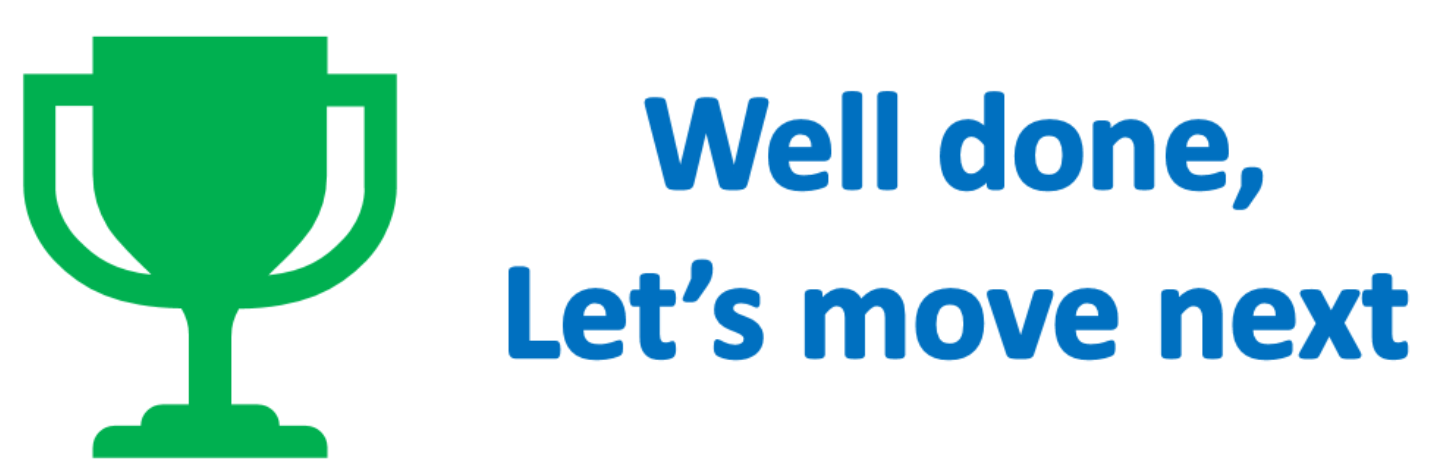